In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings

In [2]:
df = pd.read_csv(r'C:\Users\carva\OneDrive\Desktop\MLOps_project\notebook\data\stud.csv')

In [5]:
y = df['math_score']
X = df.drop(columns=['math_score'],axis=1)


In [7]:
X.head(4)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44


In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'Categories in {col}:', end="")
        print(df[col].unique())

Categories in gender:['female' 'male']
Categories in race_ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch:['standard' 'free/reduced']
Categories in test_preparation_course:['none' 'completed']


In [10]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

In [14]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [15]:
X = preprocessor.fit_transform(X)

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((800, 19), (200, 19))

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square


In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []

r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #model eval
    model_train_mae, model_train_rmse,  model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse,  model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set:")
    print("-Root Mean Squared Error {: 4f}".format(model_train_rmse))
    print("-Mean Absolute Error {: 4f}".format(model_train_mae))
    print("-R2 Score {: 4f}".format(model_train_r2))
    print("-------------------------")
    
    print("Model performance for test set:")
    print("-Root Mean Squared Error {: 4f}".format(model_test_rmse))
    print("-Mean Absolute Error {: 4f}".format(model_test_mae))
    print("-R2 Score {: 4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')


Linear Regression
Model performance for training set:
-Root Mean Squared Error  5.326948
-Mean Absolute Error  4.278203
-R2 Score  0.874133
-------------------------
Model performance for test set:
-Root Mean Squared Error  5.410754
-Mean Absolute Error  4.227891
-R2 Score  0.879689


Lasso
Model performance for training set:
-Root Mean Squared Error  6.593816
-Mean Absolute Error  5.206303
-R2 Score  0.807146
-------------------------
Model performance for test set:
-Root Mean Squared Error  6.519695
-Mean Absolute Error  5.157882
-R2 Score  0.825320


Ridge
Model performance for training set:
-Root Mean Squared Error  5.323325
-Mean Absolute Error  4.264988
-R2 Score  0.874304
-------------------------
Model performance for test set:
-Root Mean Squared Error  5.390387
-Mean Absolute Error  4.211101
-R2 Score  0.880593


K-Neighbors Regressor
Model performance for training set:
-Root Mean Squared Error  5.712219
-Mean Absolute Error  4.518750
-R2 Score  0.855268
----------------------

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879689
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851254
8,AdaBoost Regressor,0.845291
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783898
4,Decision Tree,0.755341


In [24]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.97


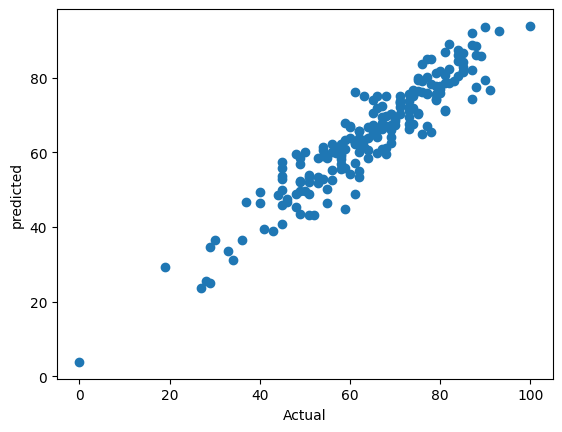

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()